# 시각장애 등급 기준

### 중증 
**1급 : 좋은 눈의 시력이 0.02이하인 사람  
2급 : 좋은 눈의 시력이 0.04이하인 사람  
3급 1호 : 좋은 눈의 시력이 0.06이하인 사람** 

- 사물에 눈을 대지 않는 한 판별이 거의 불가능한 전맹(양안실명)부터, 시력은 미약하게 남아 있지만, 비장애인에 맞춰져 있는 글씨, 그림(표지)등은 대체적으로 도움이 안 되는 사람이 여기에 속함

**3급 2호 : 두 눈의 시야가 각각 모든 방향에서 5도 이하로 남은 사람**  
- 어두운 곳에서는 전혀 활동이 불가능

### 경증
**4급 1호 : 좋은 눈의 시력이 0.1이하인 사람**
- 근거리 사물판별에는 어려움이 없음. 하지만 중장거리 물체 판별에 어려움이 있으며 근거리라고 해도 비장애인에 맞춰져있는 작은 글씨 및 그림(표지)의 판별은 쉽지않음
**5급 1호 : 좋은 눈의 시력이 0.2이하인 사람**
- 시력이 매우 나쁜 사람

**4급 2호 : 두 눈의 시야가 각각 모든 방향에서 10도 이하로 남은 사람**  
- 중증보다는 낫지만, 어두운 곳에서의 행동이 상당히 제약을 받음

**5급 2호 : 두 눈의 시야각도의 합계가 정상시야의 50% 이상 감소한 사람**  
- 가면을 쓴 것 처럼 시야를 많이 가리는 느낌

**6급 : 나쁜 눈의 시력이 0.02이하인 사람**
- 거의 정상적인 생활이 가능. 저시력 시각장애인중 유일하게 운전면허 취득이 가능한 케이스
- 원근의 판단 상실이므로 사물 운동의 세세한 면에서 취약점이 있음

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
# 한글화
fm = mp.font_manager.FontManager()
plt.rcParams['font.family'] = 'Malgun Gothic'

In [74]:
# 데이터 불러오기
df = pd.read_csv('Data/시도별_장애유형별_장애등급별_성별_등록장애인수_20210906140223.csv', encoding='cp949')
df

,시도별(1),장애유형별(1),장애유형별(2),2018,2018.1,2018.2,2018.3,2018.4,2018.5,2018.6
0,시도별(1),장애유형별(1),장애유형별(2),총계,1급,2급,3급,4급,5급,6급
1,시도별(1),장애유형별(1),장애유형별(2),계,계,계,계,계,계,계
2,전국,합계,소계,2585876,198281,342160,443328,385205,567295,649607
3,전국,지체,소계,1238532,33240,62211,149707,233449,357929,401996
4,전국,시각,소계,252957,31697,6410,11244,13229,20679,169698
5,전국,청각ㆍ언어,청각,342582,6982,44821,43856,79934,118782,48207
6,전국,청각ㆍ언어,언어,20744,98,2174,8402,10068,2,0
7,전국,지적,소계,206917,50503,72445,83969,0,0,0
8,전국,뇌병변,소계,253083,55644,48292,55847,32490,31105,29705
9,전국,자폐성,소계,26703,10472,12158,4073,0,0,0


In [75]:
df = df[df['장애유형별(1)']=='시각']

In [76]:
df = df.drop(['시도별(1)','장애유형별(1)','장애유형별(2)'], axis='columns')

In [77]:
df = df.rename(columns={'2018':'총계','2018.1':'1급', '2018.2':'2급', '2018.3':'3급', '2018.4':'4급', '2018.5':'5급', '2018.6':'6급'})

In [78]:
df = df.T

In [79]:
df

,4
총계,252957
1급,31697
2급,6410
3급,11244
4급,13229
5급,20679
6급,169698


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 총계 to 6급
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   4       7 non-null      object
dtypes: object(1)
memory usage: 112.0+ bytes


In [81]:
df = df.astype(int)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 총계 to 6급
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   4       7 non-null      int32
dtypes: int32(1)
memory usage: 84.0+ bytes


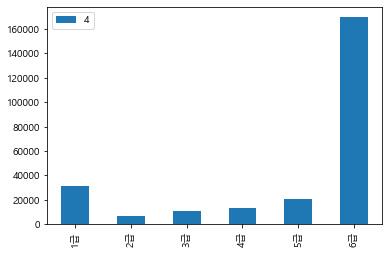

In [84]:
df.iloc[1:,:].plot(kind='bar')
plt.show()

In [93]:
total = df.loc['총계',4]

In [94]:
total

252957

In [95]:
df['비율'] = ((df[4]/total) *100)

In [96]:
df

,4,비율
총계,252957,100.000000
1급,31697,12.530588
2급,6410,2.534028
3급,11244,4.445024
4급,13229,5.229743
5급,20679,8.174907
6급,169698,67.085710


In [102]:
df = df.drop(['총계'], axis=0)

In [104]:
df

,4,비율
1급,31697,12.530588
2급,6410,2.534028
3급,11244,4.445024
4급,13229,5.229743
5급,20679,8.174907
6급,169698,67.085710


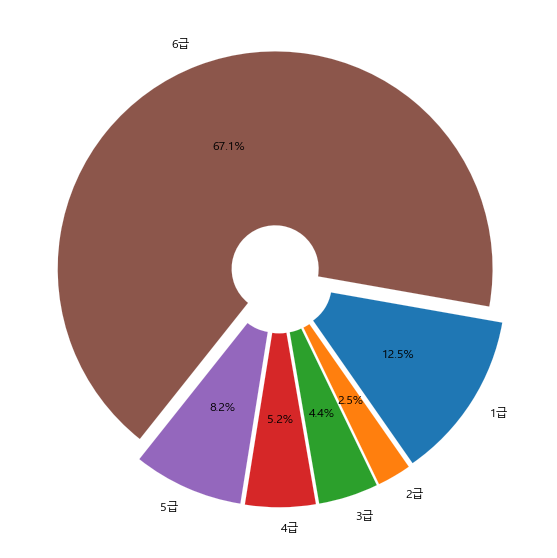

In [105]:
# plt.pie(데이터, 라벨, autopct(전체대비비율)=소수점표시, startangle(부채꼴 시작 각도), shadow(그림자 효과 유무), explode(돌출))

plt.figure(figsize=(10,10))
plt.rc('font', size=12)

ratio = df['비율'].tolist()
labels = ['1급','2급','3급','4급','5급','6급']
explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
wedgeprops={'width': 0.8, 'edgecolor': 'w', 'linewidth': 0.1}

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=-10, counterclock=False, explode=explode, wedgeprops=wedgeprops)
plt.show()